In [23]:
%pip install -r req.txt

Note: you may need to restart the kernel to use updated packages.


In [31]:
import os
os.environ["TF_CPP_MIN_LOG_LEVEL"] = "3" # ignore annoying GPU warnings
from retinaface import RetinaFace
import matplotlib.pyplot as plt
import cv2

In [32]:
# init images
face0 = cv2.imread("images/face0.jpg")
face1 = cv2.imread("images/face1.jpg")
group0 = cv2.imread("images/group0.jpg")
group1 = cv2.imread("images/group1.jpg")

In [33]:
img = group0

In [34]:
faces = RetinaFace.detect_faces(img)

In [35]:
len(faces.keys()) # returns number of faces deteched

3

In [38]:
for key in faces:
    face = faces[key]
    facial_area = face["facial_area"]  # [x1, y1, x2, y2]
    x1, y1, x2, y2 = facial_area
    cv2.rectangle(img, (x1, y1), (x2, y2), (0, 255, 0), 3)

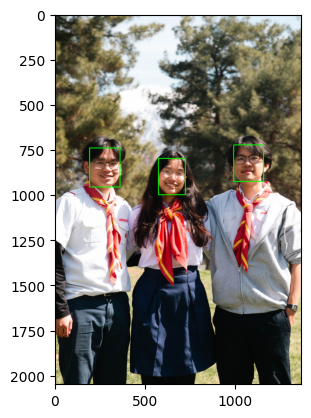

In [39]:
plt.imshow(img[:, :, ::-1]) # inverting opencv default colors back to RGB 
plt.show()

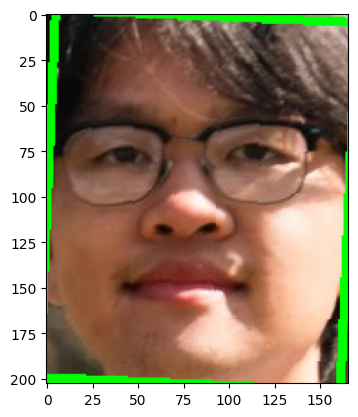

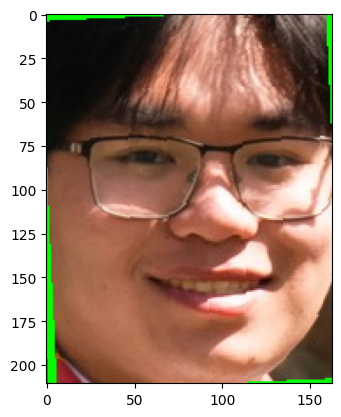

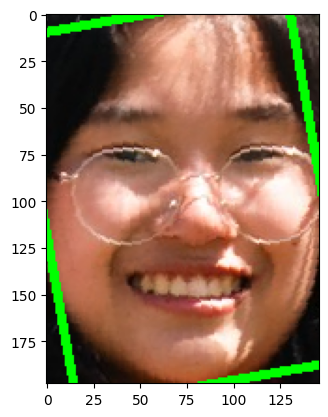

In [40]:
faces = RetinaFace.extract_faces(img, align=True)
for face in faces:
    plt.imshow(face)
    plt.show()